# **Data Science Project**
## !--IMPORTANT DETAILS --!
- **Title** ---> Heart Strok Chance Prediction
- **Dataset** ---> Healthcare-dataset-stroke-data
- **Language Used** --> Python
- **Libraries Used** --> Numpy, Pandas, Sckit-Learn, missingno, Seaborn, Matplotlib, Imbalanced-learn,
## **TASKS**
1. Data Preprocessing & Feature Engineering (Hussnain Ali)
2. EDA & Visualization (Pramay)
3. Model Training (Jagdish)
4. Model Evaluation (Arslan)
5. Documentation (Shyam Sundar)
6. Project Management & Tasks Administration (Hussnain Ali)

## 1. Initializing Setup ------------> Perfomed By Hussnain Ali

### a. Importing Libraries

Following libraries were installed and imported to use for this project:

- **warnings**: Used to suppress or manage warnings in the code to avoid cluttered output.
- **collections.Counter**: Provides a way to count occurrences of items in a collection.
- **pandas (pd)**: A powerful library for data manipulation and analysis, particularly with structured data (e.g., DataFrames).
- **numpy (np)**: A fundamental package for scientific computing, providing support for arrays, matrices, and numerical operations.
- **missingno (msno)**: A tool for visualizing missing data in a dataset to identify patterns or gaps.
- **seaborn (sns)**: A data visualization library based on Matplotlib that provides an interface for creating informative and attractive statistical graphics.
- **matplotlib.pyplot (plt)**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **imblearn.over_sampling.SMOTE**: A technique for addressing class imbalance by generating synthetic samples for the minority class.
- **imblearn.pipeline.Pipeline**: A tool for simplifying the process of chaining together multiple steps (e.g., preprocessing, modeling) in a single workflow.
- **imblearn.under_sampling.RandomUnderSampler**: A technique for addressing class imbalance by randomly under-sampling the majority class.
- **sklearn.ensemble.RandomForestClassifier**: A machine learning model based on an ensemble of decision trees, used for classification tasks.
- **sklearn.preprocessing.StandardScaler, MinMaxScaler**: Techniques for scaling features by standardizing (mean = 0, variance = 1) or normalizing (scaling to a specific range) data.
- **sklearn.preprocessing.LabelEncoder**: Converts categorical labels into numeric form for use in machine learning models.
- **sklearn.model_selection.train_test_split**: Splits data into training and testing sets to evaluate model performance.
- **sklearn.feature_selection.SelectKBest**: Selects the top k features based on a chosen statistical test.
- **sklearn.feature_selection.mutual_info_classif, chi2, f_classif**: Statistical tests for feature selection based on mutual information, Chi-squared, or ANOVA F-value respectively.
- **sklearn.metrics**: Provides various metrics like accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix for evaluating model performance.


In [2]:
import warnings
from collections import Counter
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### b. Initial Configurations

In [3]:
pd.set_option("display.float_format", "{:.3f}".format)
pd.set_option("display.max_rows", 100)
pd.set_option("display.precision", 3)
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### c. Loading Dataset and Reading Basic Information

In [4]:
# Load the dataset
df=pd.read_csv("./data/healthcare-dataset-stroke-data.csv")
df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [5]:
# Display the shape of the dataset
df.shape

(5110, 12)

In [6]:
print("Columns Information:")
df.info()

Columns Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
print("Basic Stats:")
df.describe().T

Basic Stats:


,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000


## 3. Data Preprocessing ----------> PERFORMED BY HUSSNAIN ALI

### a. Deal with Missing Values

- After analyzing the dataset  and plotting missing values with **msno.matrix()** from the missingno library, I discovered that the `BMI` column contained missing values that required attention before proceeding with model training. To address this issue without losing valuable data points, I implemented mean ***imputation - a statistical technique that replaces missing values with the average BMI from the dataset***, thereby preserving the overall distribution while maintaining the complete dataset size, which is crucial for accurate heart stroke prediction modeling.

In [8]:
# Display the number of missing values in each column
missing_values_count=df.isnull().sum()
total_cells=np.prod(df.shape)
total_missing_values=missing_values_count.sum()
percentage_missing = (total_missing_values / total_cells) * 100
percentage_missing_per_column = (missing_values_count / df.shape[0]) * 100

print("Missing Values:")
print(missing_values_count)

print(f"\nTotal Missing Values: {total_missing_values}")
print(f"Percentage of Missing Data: {percentage_missing:.3f} %")
print("\nPercentage of Missing Values Per Column:")
print(percentage_missing_per_column)

Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Total Missing Values: 201
Percentage of Missing Data: 0.328 %

Percentage of Missing Values Per Column:
id                  0.000
gender              0.000
age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
Residence_type      0.000
avg_glucose_level   0.000
bmi                 3.933
smoking_status      0.000
stroke              0.000
dtype: float64


<Axes: >

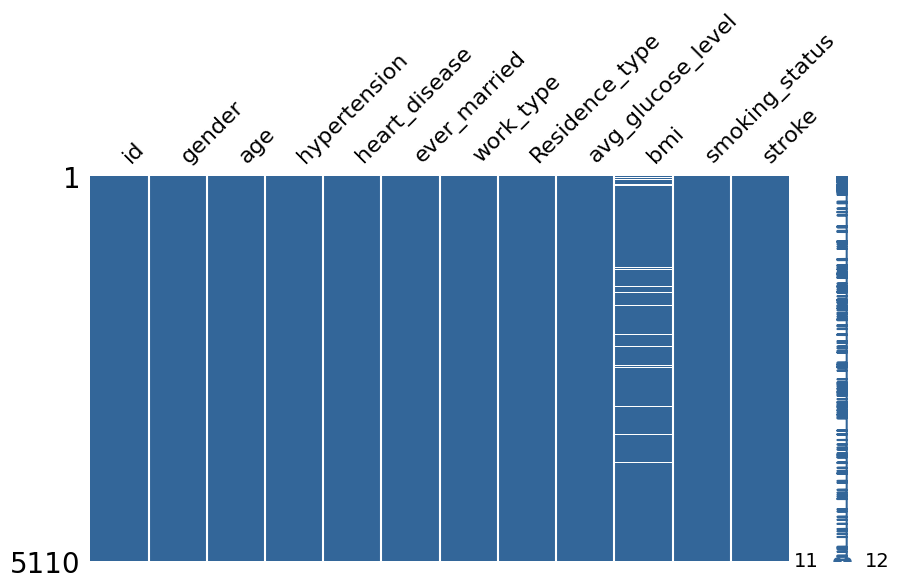

In [9]:
msno.matrix(df,figsize=(10,5),color=(0.2,0.4,0.6))

<Axes: >

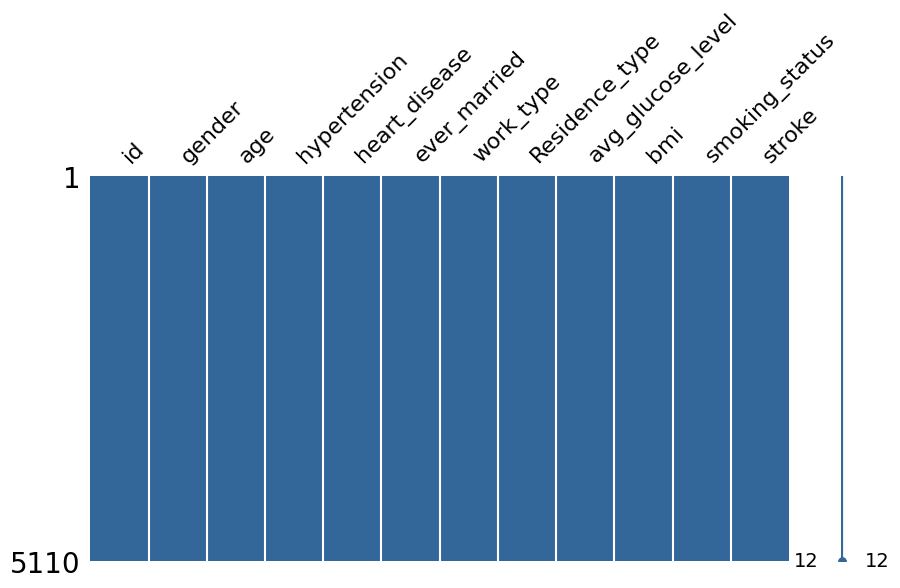

In [10]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
msno.matrix(df,figsize=(10,5),color=(0.2,0.4,0.6))


### c. Droping Unnecessary Columns
- As our aim is to train the machine learning model to predict Stroke Chances and as `id`, is not required as important features for training model, I have removed `id` from dataset

In [11]:


df=df.drop(columns=['id'],errors='ignore')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,28.893,never smoked,1
2,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


### d. Remove Duplicate Data

- Examined dataset for duplicate records using df.duplicated().sum() which returned 0
- So, the datset does not have any duplicate entry

In [12]:
print("Total fully duplicated rows:", df.duplicated().sum())
duplicate_features = df.drop(columns=["stroke"]).duplicated().sum()
print(f"Rows with duplicate features but possibly different outcomes: {duplicate_features}")


Total fully duplicated rows: 0
Rows with duplicate features but possibly different outcomes: 0


### e. Convert Data Types

- As `Age` is always considered a whole number or in other words an integer so I have converted the original datatype of age column (which was float) to integer

In [13]:
df['age']=df['age'].astype(int)

## 4. Exploratory Data Analysis (EDA)  -----------> Performed By Pramay

- I created a deep copy of original dataset to perform exploratory data analysis on dataset without modifying orignal dataset

In [14]:
vdf = df.copy(deep = True)


### 1. Distribution of strokes.

- This chart shows how many people in the dataset had a stroke and how many did not. There are two bars: one for people who had a stroke and one for people who did not. The height of each bar represents the number of people in each group. The "No Stroke" bar is much taller than the "Stroke" bar.

#### Observation:
- The chart shows that most people have not had a stroke. Only a small number of people have experienced a stroke. This means stroke cases are much fewer compared to non-stroke cases.



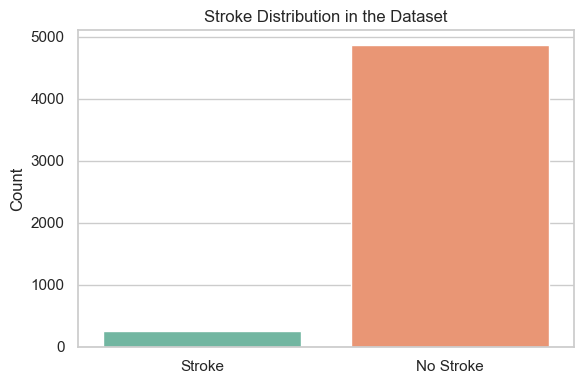

In [15]:
vdf['stroke_label'] = vdf['stroke'].map({0: 'No Stroke', 1: 'Stroke'})

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=vdf, x='stroke_label', palette='Set2')
plt.title("Stroke Distribution in the Dataset")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### 2. Stroke Count by Gender (Grouped Bar Chart)

- This chart compares the number of people who had a stroke and those who did not, separated by gender. For each gender, there are two bars showing the counts for "No Stroke" and "Stroke." Both males and females have a much higher number of people without stroke than with stroke. The chart helps us quickly see that strokes happen much less often, and the numbers are quite similar for both genders.

#### Observation:
- Stroke cases are rare for both males and females. The difference between genders is very small, meaning gender does not strongly affect stroke chances in this group.




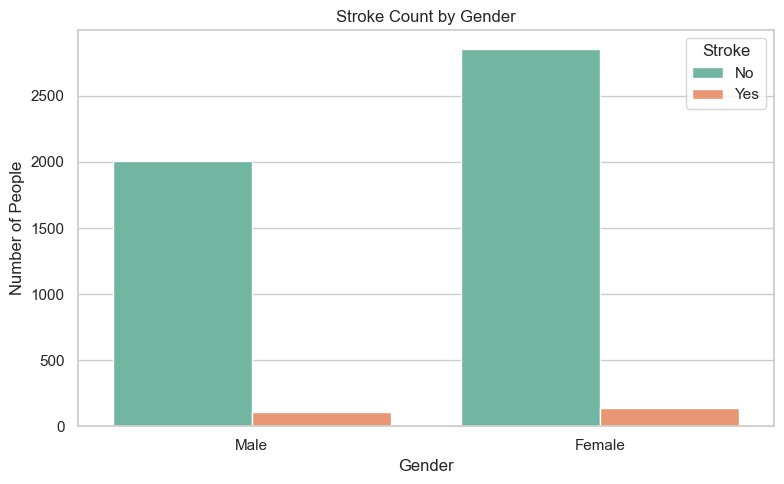

In [16]:
vdf = vdf[vdf['gender'].isin(['Male', 'Female'])]

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=vdf, x='gender', hue='stroke', palette='Set2')
plt.title("Stroke Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title="Stroke", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

### 3. The graphic displays stroke cases divided by marital status (Pie Chart)

- This chart shows the marital status of people who had a stroke. It uses a pie chart to divide the stroke cases into two groups: those who were married and those who were not. Each slice of the pie represents the percentage of stroke cases for each marital status. The chart gives a quick view of how marital status is spread among stroke patients.

#### Observation:
- Most people who had a stroke were married. A smaller portion of stroke cases came from people who were not married.




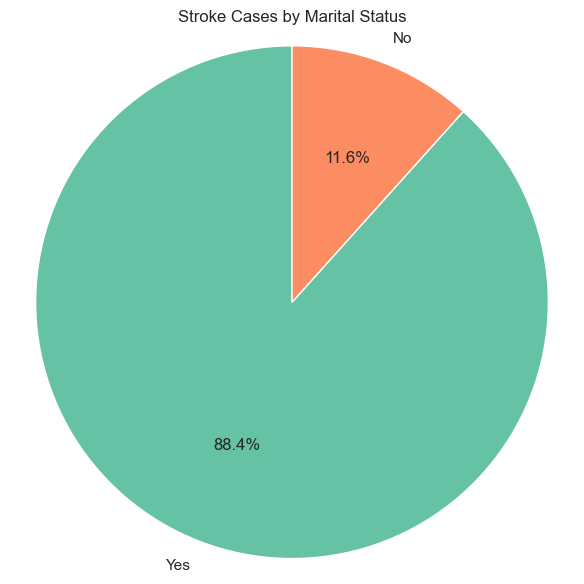

In [17]:
stroke_data = vdf[vdf['stroke'] == 1]

stroke_counts = stroke_data['ever_married'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title("Stroke Cases by Marital Status")
plt.axis('equal') 
plt.tight_layout()
plt.show()



### 4. Stroke Cases by Smoking Status (Pie Chart)

- This chart shows how smoking habits relate to people who had a stroke. It divides stroke cases into three groups: "never smoked", "formerly smoked", and "currently smoking." The size of each slice shows what percentage of stroke patients belong to each group. I added "Unknown" responses into the "never smoked" group because we don't know if those people smoked, so to keep the chart simple and avoid confusion, we safely grouped them with non-smokers.

### Observation:
- Most stroke cases came from people who either never smoked or smoked in the past. Only a smaller portion of stroke patients were current smokers.

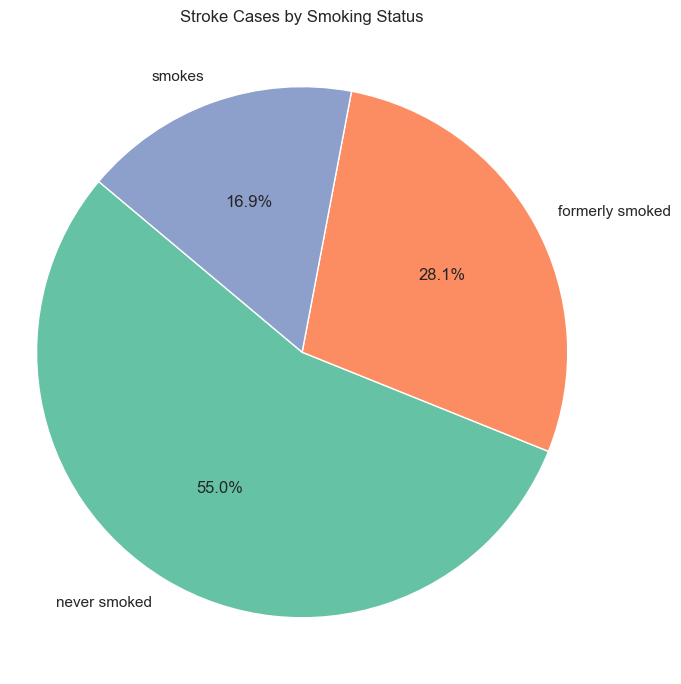

In [18]:
stroke_data = vdf[vdf['stroke'] == 1]

# Fix smoking status: add 'Unknown' to 'never smoked'
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace('Unknown', 'never smoked')

# Count smoking status
stroke_smoking = stroke_data['smoking_status'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(stroke_smoking, labels=stroke_smoking.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Set2"))
plt.title("Stroke Cases by Smoking Status")
plt.axis('equal')  # Keeps it circular
plt.tight_layout()
plt.show()


### 5. Stroke Cases by Residence Type (Bar Chart)

- This chart shows the number of people who had a stroke, separated by their type of residence (Urban or Rural). Each bar represents how many stroke cases came from people living in each area. The height of the bars makes it easy to compare the number of cases between Urban and Rural areas.

#### Observation:
- Stroke cases are slightly higher among people living in Urban areas compared to Rural areas. However, the difference between the two is not very large.


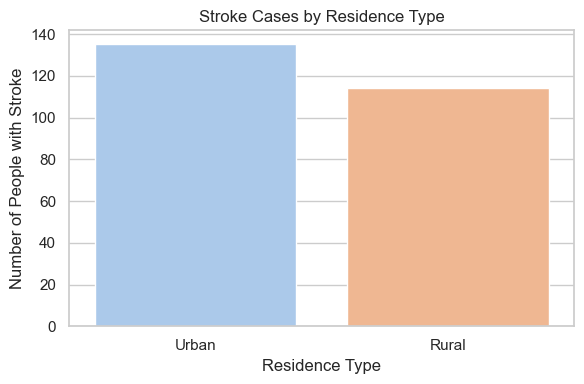

In [19]:
stroke_data = vdf[vdf['stroke'] == 1]
residence_counts = stroke_data['Residence_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=residence_counts.index, y=residence_counts.values, palette="pastel")
plt.title("Stroke Cases by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Number of People with Stroke")
plt.tight_layout()
plt.show()


### 6. Stroke by Work Type

- This chart shows how many people who had a stroke were from different work backgrounds. Each bar represents a work type, and the height shows the number of stroke cases for that group. By looking at the bars, we can easily compare which work types had more stroke cases.

#### Observation:
- Most stroke cases come from people who work in private jobs. Other groups like self-employed and government workers have fewer cases. Very few stroke cases are seen among children and people who never worked.



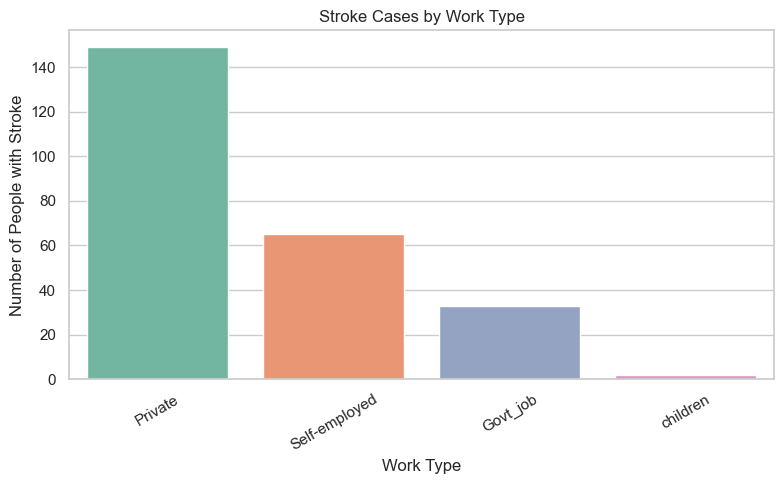

In [20]:
selected_columns = vdf[['work_type', 'stroke']]

stroke_data = selected_columns[selected_columns['stroke'] == 1]

# Count stroke cases by work type
work_counts = stroke_data['work_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=work_counts.index, y=work_counts.values, palette="Set2")
plt.title("Stroke Cases by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Number of People with Stroke")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### 7. Stroke by Gender and Age Group (Grouped Bar Chart)

- This chart shows the number of stroke cases by gender, divided into two age groups: "Under 50" and "50 and above." Each gender (Male and Female) has two bars, showing how many people in each age group had a stroke. The bar heights make it easy to compare stroke cases between age groups and genders.

#### Observation:
- Most stroke cases happen in people aged 50 and above for both males and females. Stroke cases are much lower among people under 50.


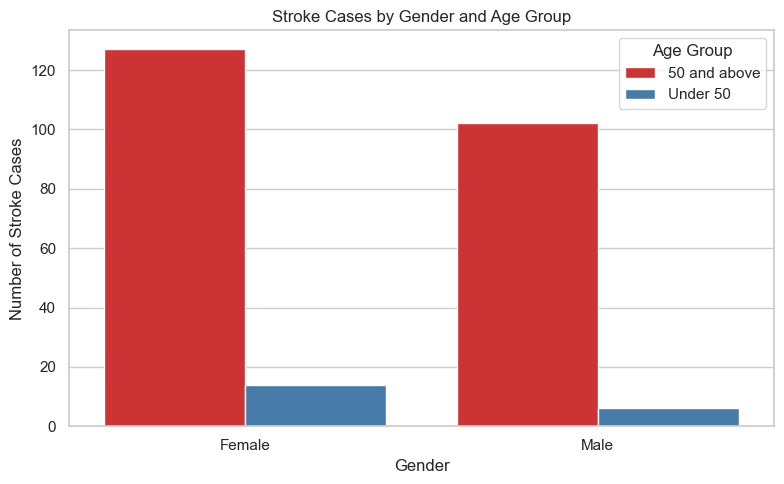

In [21]:
stroke_data = vdf[vdf['stroke'] == 1]
stroke_data['age_group'] = stroke_data['age'].apply(lambda x: 'Under 50' if x < 50 else '50 and above')
grouped = stroke_data.groupby(['gender', 'age_group']).size().reset_index(name='stroke_count')

# Plot grouped bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='gender', y='stroke_count', hue='age_group', palette="Set1")
plt.title("Stroke Cases by Gender and Age Group")
plt.xlabel("Gender")
plt.ylabel("Number of Stroke Cases")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()



### 8. Stroke vs No‑Stroke by Heart‑Disease Status (Grouped Bar Chart)
- This chart shows the number of people with and without strokes, separated by whether they have heart disease or not. Each heart disease group has two bars: one for people who had a stroke and one for those who did not. The bar heights show how many individuals fall into each category.

#### Observation:
- People with heart disease have a higher number of strokes compared to those without heart disease. However, most people overall do not have a stroke, whether or not they have heart disease.

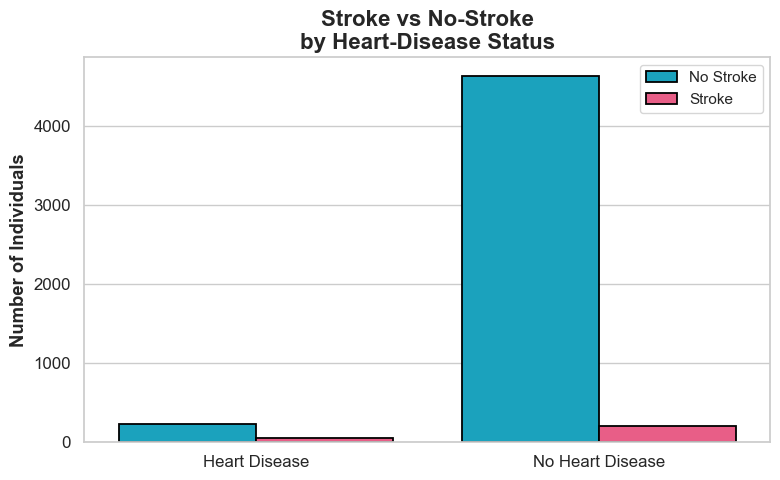

In [22]:
summary = (
    vdf.assign(
        heart_disease=vdf['heart_disease'].map({0: 'No Heart Disease', 1: 'Heart Disease'}),
        stroke=vdf['stroke'].map({0: 'No Stroke', 1: 'Stroke'})
    )
    .groupby(['heart_disease', 'stroke'])
    .size()
    .reset_index(name='count')
)

custom_palette = ['#00b4d8', '#ff477e']   

plt.figure(figsize=(8, 5))              
sns.set_theme(style="whitegrid", font_scale=1.1)
sns.barplot(
    data=summary,
    x='heart_disease',
    y='count',
    hue='stroke',
    palette=custom_palette,
    edgecolor='black',
    linewidth=1.3
)

plt.title("Stroke vs No-Stroke\nby Heart-Disease Status", fontsize=16, weight='bold')
plt.xlabel("")
plt.ylabel("Number of Individuals", weight='bold')
plt.legend(title="", loc='upper right', frameon=True, fontsize=11)
plt.tight_layout()
plt.show()


### 9. Stroke Cases by Glucose‑Level Band (Bar Chart)
- This chart shows how many people who had a stroke fall into different blood sugar (glucose) level ranges. The glucose levels are divided into five groups, and each bar represents the number of stroke cases in each range. Taller bars mean more stroke cases in that glucose range.

#### Observation:
- More stroke cases are seen in people with higher glucose levels (above 126 mg/dL). Very few stroke cases happen among people with normal glucose levels (below 100 mg/dL).

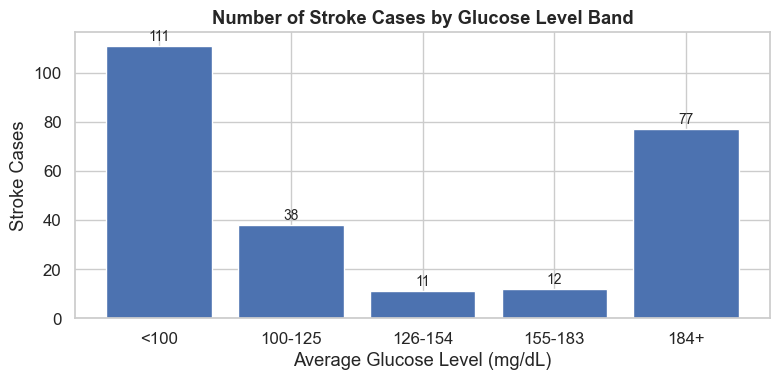

In [23]:
vdf['avg_glucose_level'] = pd.to_numeric(vdf['avg_glucose_level'], errors='coerce')
vdf = vdf.dropna(subset=['avg_glucose_level'])

# 3) Make five simple glucose bands
bins   = [0, 99, 125, 154, 183, np.inf]
labels = ['<100', '100-125', '126-154', '155-183', '184+']
vdf['glucose_band'] = pd.cut(vdf['avg_glucose_level'], bins=bins, labels=labels)

# 4) Count stroke cases in each band (stroke == 1)
stroke_counts = (
    vdf[vdf['stroke'] == 1]
    .groupby('glucose_band')
    .size()
    .reindex(labels, fill_value=0)   # keep order even if a band is empty
)

# 5) Plot a basic bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(stroke_counts.index, stroke_counts.values)

# 6) Add simple data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f"{int(height)}", ha='center', va='bottom', fontsize=10)

# 7) Clean title and axes
plt.title("Number of Stroke Cases by Glucose Level Band", fontweight='bold')
plt.xlabel("Average Glucose Level (mg/dL)")
plt.ylabel("Stroke Cases")
plt.tight_layout()
plt.show()




### 10. Stroke Cases by Age Group
#### Explanation:
- The chart shows how strokes affect people throughout different stages of age. This data sets the ages into three separate categories which include "Teenage" (0–19 years), "Adult" (20–59 years) and "Old" (60+ years). The chart demonstrates stroke occurrence rates by age group through individual bars that make it possible to analyze the age-dependent pattern of strokes.

#### Observation:
- A majority of stroke incidents target people in the "Old" group indicating that aging increases the risk of stroke development. Adults between 20-59 years have strikingly high stroke cases and teenage cases of stroke remain exceptionally infrequent.

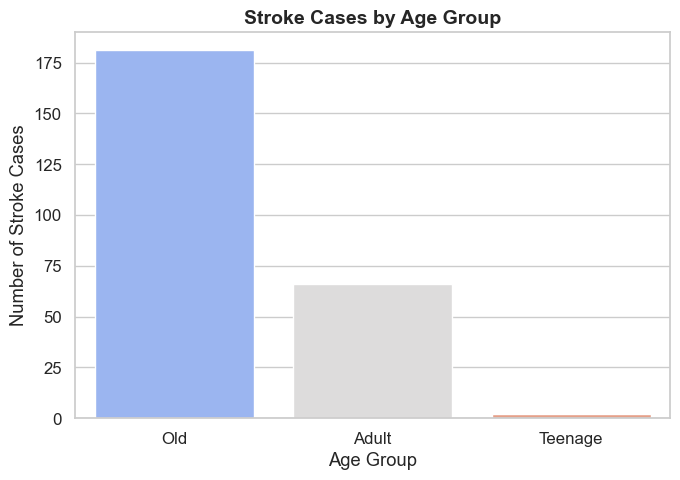

In [24]:
def age_category(age):
    if age <= 19:
        return 'Teenage'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Old'

vdf['age_group'] = vdf['age'].apply(age_category)

# Filter only stroke cases
stroke_data = vdf[vdf['stroke'] == 1]

# Count stroke cases by age group
age_group_counts = stroke_data['age_group'].value_counts()

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="coolwarm")
plt.title("Stroke Cases by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Number of Stroke Cases")
plt.tight_layout()
plt.show()


### 11. Over-all Comparison of Five‑Panel Stroke‑Risk Dashboard – What the Charts Reveal
Explanation:
This figure shows how different factors relate to stroke cases. Strokes are more common in people aged 50+, those with heart disease, high glucose levels, and hypertension. Smoking, whether current or past, also appears linked to more stroke cases.

#### Observations:
- Stroke cases are more common in people aged 50+, those with heart disease, hypertension, high glucose levels, and among smokers or ex-smokers.

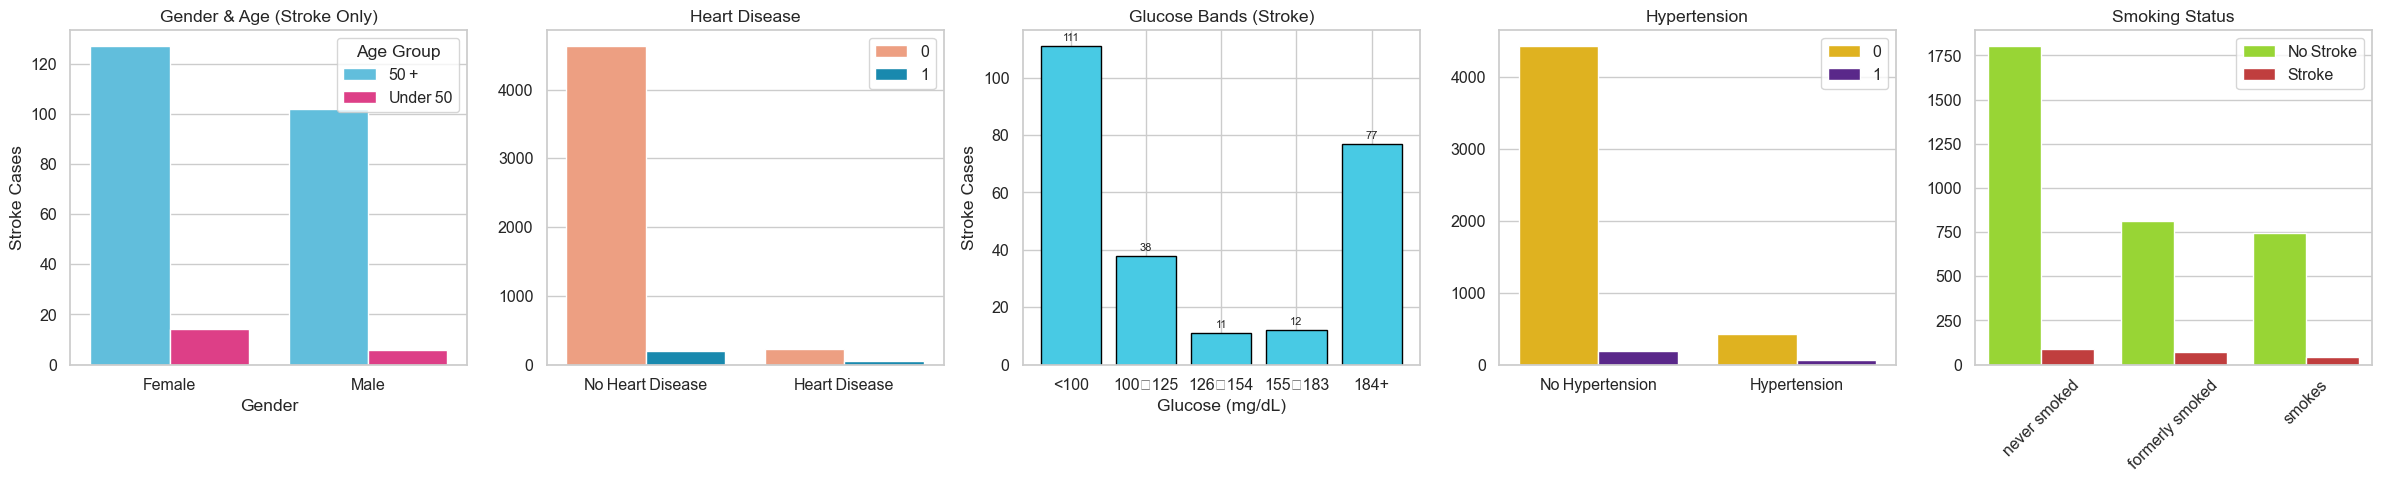

In [25]:
sns.set_theme(style="whitegrid", font_scale=1.05)
# Helper function to build grouped counts
def grouped_counts(data, col, positive_label=None, order=None):
    """Return dataframe with 'category', 'stroke', 'count' columns."""
    if positive_label:   # map 0/1 to text if desired
        data = data.assign(**{col: data[col].map({0: f"No {positive_label}", 1: positive_label})})
    grp = (data.groupby([col, 'stroke'])
                 .size()
                 .reset_index(name='count'))
    if order is not None:
        grp[col] = pd.Categorical(grp[col], categories=order, ordered=True)
    return grp.sort_values(col)

# ── 1) Gender × Age Group ──────────────────────────────────
stroke_only = vdf[vdf['stroke'] == 1].copy()
stroke_only['age_group'] = np.where(stroke_only['age'] < 50, "Under 50", "50 +")
gender_age = (stroke_only.groupby(['gender', 'age_group'])
                         .size().reset_index(name='count'))

# ── 2) Heart‑Disease ───────────────────────────────────────
heart_d = grouped_counts(vdf, 'heart_disease', positive_label='Heart Disease', order=['No Heart Disease','Heart Disease'])

# ── 3) Glucose Bands ───────────────────────────────────────
vdf['avg_glucose_level'] = pd.to_numeric(vdf['avg_glucose_level'], errors='coerce')
vdf = vdf.dropna(subset=['avg_glucose_level'])
bins   = [0, 99, 125, 154, 183, np.inf]
labels = ['<100', '100‑125', '126‑154', '155‑183', '184+']
vdf['glucose_band'] = pd.cut(vdf['avg_glucose_level'], bins=bins, labels=labels)
glucose = (vdf[vdf['stroke'] == 1]
           .groupby('glucose_band')
           .size().reindex(labels, fill_value=0))

# ── 4) Hypertension ────────────────────────────────────────
hyper = grouped_counts(vdf, 'hypertension', positive_label='Hypertension', order=['No Hypertension','Hypertension'])

# ── 5) Smoking Status ──────────────────────────────────────
smoke_order = ['never smoked', 'formerly smoked', 'smokes']
smoking = (vdf.assign(stroke=vdf['stroke'].map({0:'No Stroke',1:'Stroke'}))
             .groupby(['smoking_status','stroke']).size()
             .reset_index(name='count')
             .query("smoking_status != 'Unknown'")
             .assign(smoking_status=lambda d: pd.Categorical(d['smoking_status'], smoke_order))
             .sort_values('smoking_status'))

# ── Build 1×5 subplot figure ───────────────────────────────
fig, axes = plt.subplots(1, 5, figsize=(24, 5), sharey=False)

# Plot 1 – Gender × Age
sns.barplot(ax=axes[0], data=gender_age, x='gender', y='count', hue='age_group',
            palette=['#4cc9f0','#f72585'])
axes[0].set_title("Gender & Age (Stroke Only)")
axes[0].set_xlabel("Gender"); axes[0].set_ylabel("Stroke Cases")
axes[0].legend(title='Age Group', loc='upper right')

# Plot 2 – Heart Disease
sns.barplot(ax=axes[1], data=heart_d, x='heart_disease', y='count', hue='stroke',
            palette=['#ff9770','#0096c7'])
axes[1].set_title("Heart Disease")
axes[1].set_xlabel(""); axes[1].set_ylabel("")
axes[1].legend(title='', loc='upper right')

# Plot 3 – Glucose Bands
axes[2].bar(glucose.index, glucose.values, color='#48cae4', edgecolor='black')
for x,y in zip(glucose.index, glucose.values):
    axes[2].text(x, y+1, int(y), ha='center', va='bottom', fontsize=8)
axes[2].set_title("Glucose Bands (Stroke)")
axes[2].set_xlabel("Glucose (mg/dL)"); axes[2].set_ylabel("Stroke Cases")

# Plot 4 – Hypertension
sns.barplot(ax=axes[3], data=hyper, x='hypertension', y='count', hue='stroke',
            palette=['#ffc300','#5a189a'])
axes[3].set_title("Hypertension")
axes[3].set_xlabel(""); axes[3].set_ylabel("")
axes[3].legend(title='', loc='upper right')

# Plot 5 – Smoking Status
sns.barplot(ax=axes[4], data=smoking, x='smoking_status', y='count', hue='stroke',
            palette=['#9ef01a','#d62828'])
axes[4].set_title("Smoking Status")
axes[4].set_xlabel(""); axes[4].set_ylabel("")
axes[4].tick_params(axis='x', rotation=45)
axes[4].legend(title='', loc='upper right')

plt.tight_layout()
plt.show()


 ## 5. Feature Engineering ----> PERFORMED BY HUSSNAIN ALI

### a. Encoding Categorical Variables

##### -- Categorical features were encoded to convert non-numeric data into a numerical format that machine learning algorithms can understand and process.
- **LabelEncoder** for binary categorical features such as `ever-married`, `hyper_tension`, `heart_disease`, `Residence_type` and `stroke`, was used because these columns contain only two unique values, allowing them to be efficiently mapped to 0 and 1 without introducing any ordinal relationship or additional columns.
- **One-Hot Encoding** was applied to non-binary categorical features such as `gender` because these columns have more than two categories, and one-hot encoding creates separate binary columns for each category, preventing the model from assuming any ordinal relationship among the categories and ensuring proper representation for machine learning algorithms.

In [26]:
mdf=df.copy(deep=True)

categorical_features = []
discrete_features = []
binary_features=[]
non_binary_features=[]
for i in mdf.columns:
    if df[i].nunique() > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)
        if df[i].nunique()==2:
            binary_features.append(i)
        else:
            non_binary_features.append(i)
        

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)
print('Binary Categorical Features:',*binary_features)
print('Non_Binary Categorical Features',*non_binary_features)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi
Binary Categorical Features: hypertension heart_disease ever_married Residence_type stroke
Non_Binary Categorical Features gender work_type smoking_status


In [27]:
le=LabelEncoder()
binary_features=[col for col in binary_features if col not in ['hypertension', 'heart_disease']]
print("Encoding Binary Features:")
for col in binary_features:
    mdf[col]=le.fit_transform(mdf[col])
    print(f"{col} : {mdf[col].unique()} = {le.inverse_transform(mdf[col].unique())} ")

mdf['gender'] = pd.Categorical(
    mdf['gender'],
    categories=['Other','Male','Female'] , 
    ordered=False
)

mdf=pd.get_dummies(mdf,columns=['gender'],drop_first=True,dtype=int)
mdf.head()

Encoding Binary Features:
ever_married : [1 0] = ['Yes' 'No'] 
Residence_type : [1 0] = ['Urban' 'Rural'] 
stroke : [1 0] = [1 0] 


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Female
0,67,0,1,1,Private,1,228.690,36.600,formerly smoked,1,1,0
1,61,0,0,1,Self-employed,0,202.210,28.893,never smoked,1,0,1
2,80,0,1,1,Private,0,105.920,32.500,never smoked,1,1,0
3,49,0,0,1,Private,1,171.230,34.400,smokes,1,0,1
4,79,1,0,1,Self-employed,0,174.120,24.000,never smoked,1,0,1


### b. Creating new Features

#### --- New features were created to simplify and consolidate information for better model interpretability and performance.
- The `has_smoked` feature was created by assigning 1 to individuals who 'smoke' or 'formerly smoked', and 0 to those who 'never smoked' or whose smoking status was unknown (assuming unknown as never smoked).
- The `is_working` feature was created by assigning 1 to individuals with work types 'Private', 'Self_employed', 'Govt_job', or 'children', and 0 to those who 'never_worked' or had other/unknown work types, thus distinguishing between working and non-working individuals.

In [28]:
print("Current Features:")
print(mdf.columns.tolist())

Current Features:
['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'gender_Male', 'gender_Female']


In [29]:
mdf['has_smoked'] = mdf['smoking_status'].apply(
    lambda x: 1 if x in ['formerly smoked', 'smokes'] else 0 if x == 'never smoked' else None
)
mdf['is_working'] = mdf['work_type'].apply(
    lambda x: 1 if x in ['Private','Self_employed','Govt_job','children'] else 0 if x == 'Never_worked' else None
)

mdf['has_smoked']=mdf['has_smoked'].fillna(mdf['has_smoked'].mode()[0])
mdf['is_working']=mdf['is_working'].fillna(mdf['is_working'].mode()[0])
mdf['is_working']=mdf['is_working'].astype(int)
mdf['has_smoked']=mdf['has_smoked'].astype(int)

mdf.drop(columns=['smoking_status','work_type'],inplace=True,errors='ignore')
categorical_features.clear()

mdf.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Female,has_smoked,is_working
0,67,0,1,1,1,228.690,36.600,1,1,0,1,1
1,61,0,0,1,0,202.210,28.893,1,0,1,0,1
2,80,0,1,1,0,105.920,32.500,1,1,0,0,1
3,49,0,0,1,1,171.230,34.400,1,0,1,1,1
4,79,1,0,1,0,174.120,24.000,1,0,1,0,1


### b. Renaming Columns

- Renamed columns to more descriptive names and reordered them for clarity, then identified categorical and discrete features for further analysis.

In [30]:
mdf = mdf.rename(columns={
   'gender_Male': 'Male',
   'gender_Female':'Female',
   'hypertension': 'Has_Hypertension',
   'heart_disease': 'Has_Heart_Disease',
   'avg_glucose_level': 'Avg_Glucose',
   'bmi': 'Body_Mass_Index',
   'stroke': 'Stroke_Chance',
   'age': 'Age',
   'has_smoked': 'Has_Smoked',
   'is_working': 'Is_Working',
   'gender':'Gender',
   'ever_married':'Married',
   'Residence_type':'Residence_Type'
    
})
mdf=mdf[['Age','Male','Female','Married','Residence_Type','Has_Hypertension','Has_Heart_Disease','Has_Smoked','Is_Working',
                    'Body_Mass_Index','Avg_Glucose','Stroke_Chance']]


categorical_features=[col for col in mdf.columns if len(mdf[col].unique())<=2 and col not in ['Stroke_Chance']]
discrete_features.clear()
discrete_features=[col for col in mdf.columns if len(mdf[col].unique())>6]
print(f"Current Categorical Features: {categorical_features}")
print(f"Current Discrete Features: {discrete_features}")
print("Current Dataset:")
mdf.head()

Current Categorical Features: ['Male', 'Female', 'Married', 'Residence_Type', 'Has_Hypertension', 'Has_Heart_Disease', 'Has_Smoked', 'Is_Working']
Current Discrete Features: ['Age', 'Body_Mass_Index', 'Avg_Glucose']
Current Dataset:


,Age,Male,Female,Married,Residence_Type,Has_Hypertension,Has_Heart_Disease,Has_Smoked,Is_Working,Body_Mass_Index,Avg_Glucose,Stroke_Chance
0,67,1,0,1,1,0,1,1,1,36.600,228.690,1
1,61,0,1,1,0,0,0,0,1,28.893,202.210,1
2,80,1,0,1,0,0,1,0,1,32.500,105.920,1
3,49,0,1,1,1,0,0,1,1,34.400,171.230,1
4,79,0,1,1,0,1,0,0,1,24.000,174.120,1


### c. Handling Outliers
Outliers can distort statistical analyses and negatively impact the performance of machine learning models by skewing distributions and influencing model parameters.

-  Outliers are data points that significantly deviate from the majority of the data, often lying far outside the typical range of values for a given feature. In this dataset `Avg_Gulcose` and `Body_Mass_Index` features have outliers

-  Outliers in numeric features (`Body_Mass_Index`, `Avg_Glucose`) were removed using the Interquartile Range (IQR) method, which excludes values lying below Q1 - 1.5×IQR or above Q3 + 1.5×IQR, ensuring a cleaner and more robust dataset for analysis.
- Plotted boxplots for `Body_Mass_Index` and `Avg_Glucose` to visually identify outliers in the numeric features before and after fixing them respectively.

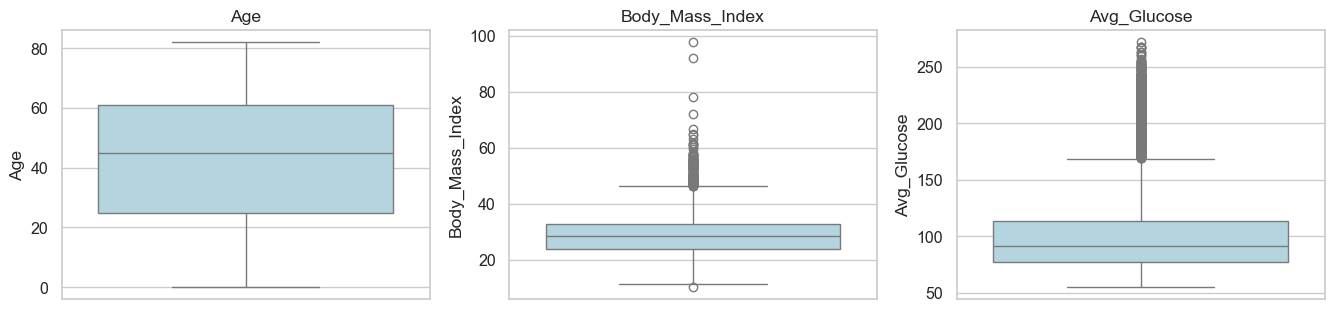

In [31]:
numeric_cols = ['Age', 'Body_Mass_Index', 'Avg_Glucose']

# Plot boxplots
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=mdf[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [32]:
def remove_outliers_iqr(mdf, column):
    Q1 = mdf[column].quantile(0.25)
    Q3 = mdf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    return mdf[(mdf[column] >= lower_bound) & (mdf[column] <= upper_bound)]

# Apply IQR method to the ratio columns
mdf = remove_outliers_iqr(mdf, 'Body_Mass_Index')
mdf = remove_outliers_iqr(mdf, 'Avg_Glucose')

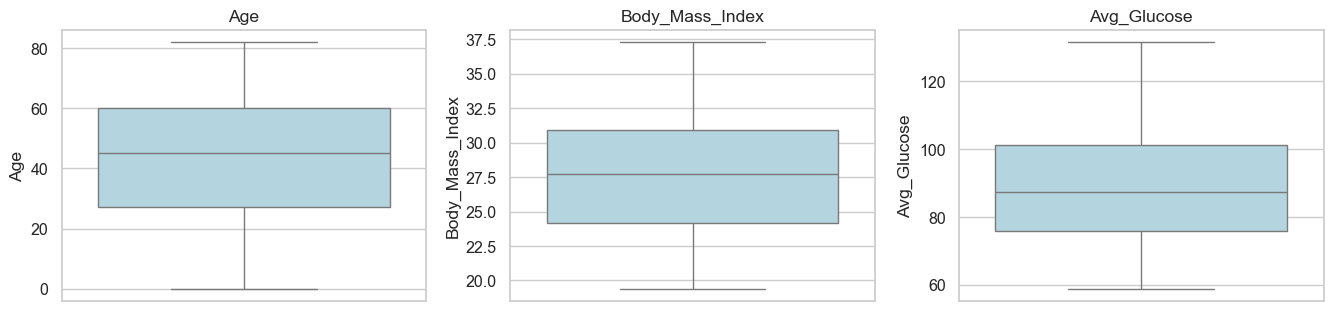

In [33]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=mdf[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

### d. Data Balancing
   - The dataset showed significant class imbalance where the majority of cases were `non-stroke` instances, which could lead to biased model predictions if left unaddressed.

   - The combined approach of **SMOTE** and **RandomUnderSampler** was used because it creates an optimally balanced dataset by simultaneously generating synthetic minority samples and reducing majority samples, which effectively minimizes model bias while avoiding excessive data duplication, ultimately leading to improved stroke detection capabilities and enhanced overall predictive performance of the model. 

   The implementation is explained as follows:
   1. **SMOTE (Synthetic Minority Over-sampling Technique)**
      - Used to increase the minority class (stroke cases)
      - Creates synthetic examples rather than simple replication
      - Helps prevent overfitting that can occur with basic oversampling

   2. **RandomUnderSampler**
      - Applied to reduce the majority class (non-stroke cases)
      - Randomly removes examples from the majority class
      - Helps achieve a more balanced ratio between classes

In [34]:
over_sampling = SMOTE(sampling_strategy = 1)
under_sampling = RandomUnderSampler(sampling_strategy = 0.1)
features = mdf.loc[:,: 'Avg_Glucose']
target= mdf.loc[:,'Stroke_Chance']

steps = [('under', under_sampling),('over', over_sampling)]
pipeline = Pipeline(steps=steps)
features, target = pipeline.fit_resample(features, target)

Counter(target)

Counter({0: 1380, 1: 1380})

### e. Data Splitting
We used the train_test_split() function from scikit-learn to divide our dataset into two parts: training data and testing data. Specifically, we split the data into 80% training and 20% testing using the parameter test_size=0.2. This means 80% of the data is used to train the model, and the remaining 20% is used to evaluate its performance on unseen data.


In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = RANDOM_STATE)

### f. Handling Data Leakage

Data leakage occurs when information from outside the training set (just like our synthetically created data during data balancing) influences the model, leading to unrealistic and overoptimistic performance metrics.
- Visualizations such as correlation matrix, mutual information scores, chi-square scores, and ANOVA were creating using only training data to analyze feature relationships and importance while preventing any test data influence on feature selection or scaling decisions.

- ***Correlation analysis*** shows that `Age` has the strongest positive correlation (0.58) with stroke chance, while other features like gender (`Male`/`Female`) and `Residence_Type` have weak negative correlations.

- ***Mutual Information*** indicates that `Residence_Type` and `Male` have slightly higher relevance among categorical features, but the overall mutual information values are quite low (around 0.04), suggesting weak relationships.

- ***Chi-Squared test*** highlights `Male`, `Residence_Type`, and `Female` as the most dependent categorical variables with `stroke chance`, with `Male` having the highest chi-squared score (66.73).

- ***ANOVA analysis*** for numerical features strongly confirms that `Age` is the most significant numerical predictor (ANOVA score: 1145.79), while `Body Mass Index` and `Average Glucose` have minimal influence.
- `Age` is the most important factor affecting stroke chance, while gender (`Male`/`Female`) and `Residence_Type` show moderate relevance. Other features contribute minimally to stroke prediction.

Text(0.5, 1.0, 'Selection of Numerical Features')

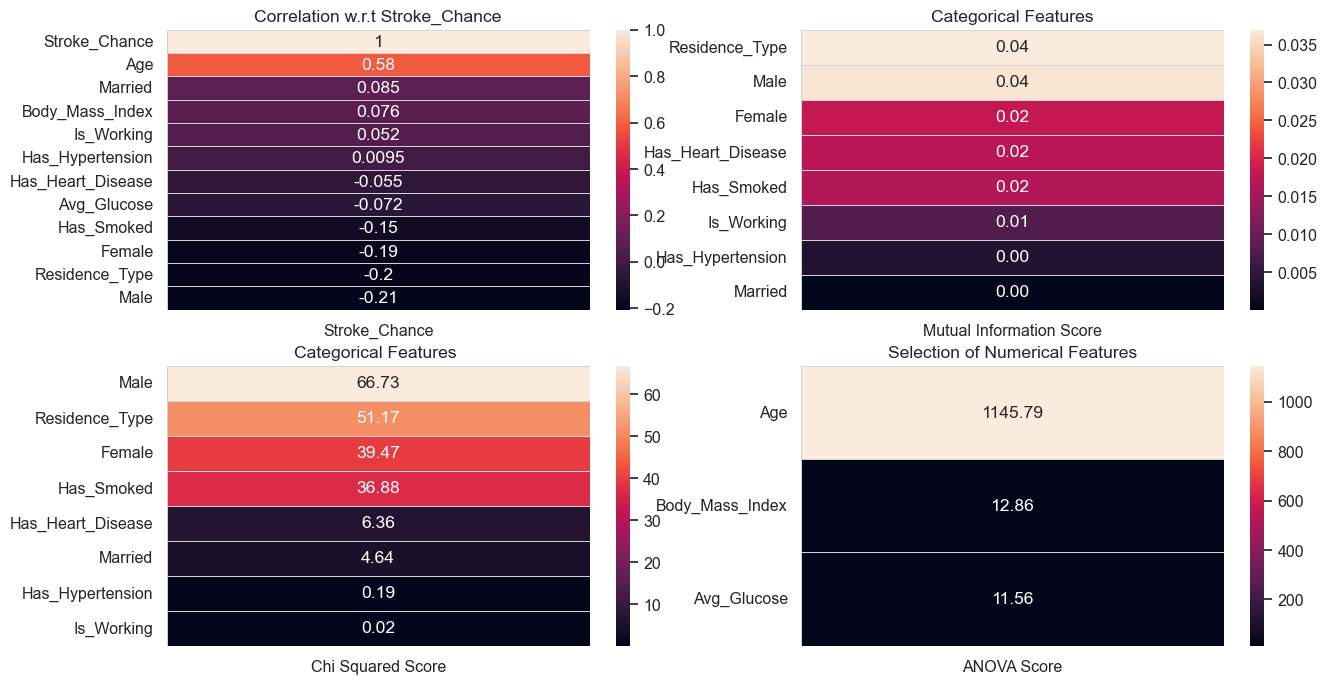

In [36]:
# Limiting the data to only train data to avoid data leakage
x_train_test = x_train.copy(deep = True)
x_train_test['Stroke_Chance'] = y_train

# Visualizations for Non-Leaked Data


# Visualizing the correlation matrix
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))

plt.subplot(2,2,1)
corr = x_train_test.corrwith(x_train_test['Stroke_Chance']).sort_values(ascending = False).to_frame()
corr.columns = ['Stroke_Chance']
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'lightgrey')
plt.title('Correlation w.r.t Stroke_Chance')

# Visualizing the mutual information score for the categorical features for Non-Leaked Data
plt.subplot(2,2,2)
tf = x_train.loc[:,categorical_features]
tt = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(tf,tt)

featureScores = pd.DataFrame(data = fit.scores_,index = list(tf.columns),columns = ['Mutual Information Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,linewidths = 0.4,linecolor = 'lightgrey',fmt = '.2f');
plt.title('Categorical Features')

# Visualizing the CHI-square Score for the categorical features for Non-Leaked Data
plt.subplot(2,2,3)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(tf,tt)

featureScores = pd.DataFrame(data = fit.scores_,index = list(tf.columns),columns = ['Chi Squared Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'lightgrey',fmt = '.2f');
plt.title('Categorical Features ')

# Visualizing the CHI-square Score for the categorical features
plt.subplot(2,2,4)
tf = x_train.loc[:,discrete_features]
tt = y_train

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(tf,tt)

featureScores = pd.DataFrame(data = fit.scores_,index = list(tf.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'lightgrey',fmt = '.2f');
plt.title('Selection of Numerical Features')





### g. Best Feature Selection

- From analysis of dataset w.r.t data leakage, It is evident that `Age` is highly predictive of stroke chance without signs of data leakage, while features like Gender (i.e. `Male` and `Female`) and `Residence_Type` show moderate influence and no feature appears to directly leak the target variable.
- So, for the purpose of not missing hidden signals for prediction of stroke chance, we will keep all features provided in dataset

In [37]:
# x_train = x_train.drop(columns = ['Has_Heart_Disease', 'Has_Hypertension','Avg_Glucose'])
# x_test = x_test.drop(columns = ['Has_Heart_Disease', 'Has_Hypertension','Avg_Glucose'])


### h. Feature/Data Scaling

Feature scaling is essential for ensuring that all features contribute equally to the model. Without scaling, features with larger numeric values could dominate the learning process, leading to biased models. Scaling also improves convergence speed in gradient-based models and ensures that distance-based algorithms like KNN or SVM work effectively.

The following techniques were used to scale the data:
- **Min-Max Scaling**: Applied to discrete features to scale them to a range of [0, 1].

- **Standard Scaling**: Used for categorical features to standardize them by centering the data (mean = 0) and scaling it (variance = 1).

In [38]:
minmax_scaler = MinMaxScaler()
standard_scaler= StandardScaler()

discrete_features=[col for col in discrete_features if col not in ['Avg_Glucose']]
categorical_features=[col for col in categorical_features if col not in ['Has_Heart_Disease', 'Has_Hypertension']]


for col in discrete_features:
    if col in x_train.columns and col in x_test.columns:
        x_train[[col]]=minmax_scaler.fit_transform(x_train[[col]])
        x_test[[col]]=minmax_scaler.transform(x_test[[col]])
   
    
for col in categorical_features:
     if col in x_train.columns and col in x_test.columns:
                x_train[[col]]=standard_scaler.fit_transform(x_train[[col]])
                x_test[[col]]=standard_scaler.transform(x_test[[col]])


## 6. Model Training ------> PERFORMED BY JAGDISH

Model training is done so that the machine learning algorithm can learn from the historical data and make accurate predictions on unseen data. It involves feeding the model with training data and allowing it to adjust its parameters to minimize error.

Model training normally involves the following steps:

1. **Data Prepration**  
   Gathering relevant datasets and preparing them in a usable format (e.g., removing null values, converting categorical variables, etc.)

2. **Data Splitting**  
   Dividing the dataset into training, validation, and testing sets to evaluate model performance accurately.

3. **Data Scaling/Normalization**  
   Scaling the features to a uniform range so that the model does not give preference to features with higher values.

4. **Data Balancing**  
   Handling imbalanced datasets (if any) using techniques such as oversampling, undersampling, or SMOTE to prevent model bias.

5. **Model Selection**  
   Choosing an appropriate algorithm (e.g., Decision Tree, Random Forest, SVM, etc.) based on the nature of the data and the problem.

6. **Model Training (Fitting)**  
   Training the model on the training dataset by feeding inputs and adjusting internal weights/parameters.

7. **Hyperparameter Tuning**  
   Optimizing the model's hyperparameters to enhance its performance, often using techniques like Grid Search or Random Search.

8. **Validation & Evaluation**  
   Using validation data to check for overfitting/underfitting and evaluating final performance using test data.

---

Some of these steps — such as **Data Prepreparing**, **Data Splitting**, **Data Scaling**, and **Data Balancing** — have already been performed by **Hussnain Ali** as part of the **Data Preprocessing**,**Feature Engineering** process. 

So, in this section our main focus will be on **Model Selection**, **Model Training**, **Hyperparameter Tuning**


### a. Model Selection & Training
For our dataset, we decided to use the **Random Forest Classifier** from Scikit-learn to train the machine learning model because of the following reasons:

- **Imbalanced Data Handling**  
  - Works well with imbalanced datasets.  
  - Supports `class_weight='balanced'` to give more weight to the minority class.  
  - Complements SMOTE-generated synthetic data effectively.

- **Compatibility with Cleaned and Scaled Data**  
  - Although Random Forest does not require feature scaling, it works well with already scaled data.  
  - Our dataset was preprocessed with outlier removal and scaling to improve overall data quality.

- **Stable and Accurate Predictions**  
  - Reduces overfitting by averaging multiple decision trees.  
  - Provides consistent performance across various data splits.

- **Compared to Other Models**  
  - Logistic Regression assumes linearity and may miss complex relationships.  
  - SVM is sensitive to data imbalance and needs careful parameter tuning.  
  - KNN struggles with imbalanced data and high-dimensional spaces.  
  - XGBoost is strong but requires more tuning and is less interpretable for clinical decision-making.

Therefore, Random Forest offers a solid balance of accuracy, robustness, and suitability for our stroke prediction task on a preprocessed and balanced dataset.

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### b. Hyperparameter Tuning
After training the initial model, we perform **hyperparameter tuning** to find the optimal combination of parameters that improve model performance. Random Forest has several hyperparameters such as:

- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of each tree.
- `min_samples_split`: Minimum number of samples required to split a node.
- `min_samples_leaf`: Minimum number of samples required at a leaf node.
- `max_features`: Number of features to consider when looking for the best split.

We use **GridSearchCV** from Scikit-learn to test different combinations of these parameters through cross-validation and choose the one that gives the best result based on scoring metrics like F1-score.

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## 7. Model Evaluation --------> PERFORMED BY Arslan
Once the model is trained, it is important to evaluate its performance to ensure it generalizes well to unseen data and makes reliable predictions. Model evaluation helps us identify how well the model distinguishes between stroke and no-stroke cases in our binary classification task.

We used the following metrics for evaluation:

- **Accuracy**  
  - Measures the overall correctness of the model.
  - However, accuracy alone is not reliable for imbalanced datasets because it may be biased toward the majority class.

- **Precision**  
  - Indicates how many predicted stroke cases were actually correct.
  - Important when the cost of false positives is high.

- **Recall (Sensitivity)**  
  - Measures how many actual stroke cases were correctly identified.
  - Crucial in medical datasets where missing a true case can be critical.

- **F1-Score**  
  - Harmonic mean of precision and recall.
  - Balances both metrics, especially useful for imbalanced data.

- **Confusion Matrix**  
  - A visual tool that shows the number of true positives, false positives, true negatives, and false negatives.
  - Helps us understand the types of errors the model is making.

Accuracy: 0.94
Precision: 0.93
Recall: 0.96
F1-Score: 0.94
AUC-ROC: 0.94


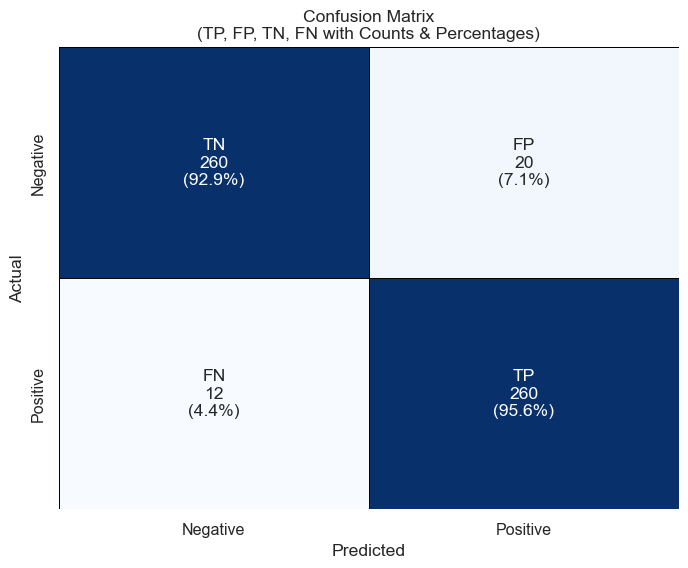

In [41]:
# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_tuned):.2f}")



cm = confusion_matrix(y_test, y_pred_tuned)
total_samples = np.sum(cm)

# Calculate percentages
cm_percent = (cm / cm.sum(axis=1)[:, np.newaxis] )* 100  # Row-wise percentage

class_names = ['No Stroke', 'Stroke']

annot = np.empty_like(cm, dtype=object)
annot[0, 0] = f"TN\n{cm[0,0]}\n({cm_percent[0,0]:.1f}%)"
annot[0, 1] = f"FP\n{cm[0,1]}\n({cm_percent[0,1]:.1f}%)"
annot[1, 0] = f"FN\n{cm[1,0]}\n({cm_percent[1,0]:.1f}%)"
annot[1, 1] = f"TP\n{cm[1,1]}\n({cm_percent[1,1]:.1f}%)"

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=annot, 
            fmt='',  # Disable default annotation
            cmap='Blues',
            linewidths=0.5,
            linecolor='black',
            cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\n(TP, FP, TN, FN with Counts & Percentages)')
plt.show()

